# Packages Loading

In [ ]:
import numpy as np
import pandas as pd
!pip install pmdarima


In [ ]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
daily_df_orig =pd.read_csv('Daily_Final_Data.csv')
daily_df_orig['Date'] = pd.to_datetime(daily_df_orig['Date'])
daily_df_orig.head()

,Date,SSE Composite,S&P/ASX 200,BSE Sensex,Dow Jones,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng,...,unemployment,unemployment_pct_change,Global_Banks_Index,Returns,Daily_Returns_Z_Score,Weekly_Returns,Z_Score_Weekly_Returns,daily_anomaly,weekly_anomaly,anomaly_score
0,2006-01-03,1161.057007,4776.000000,9539.370117,10847.410156,4776.979980,5681.500000,5460.680176,1268.800049,14944.769531,...,4.7,-4.1,27.035220,0.016221,1.964517,0.001861,-0.011804,0,0,0.0
1,2006-01-04,1180.963013,4820.299805,9648.080078,10880.150391,4838.520020,5714.600098,5523.620117,1273.459961,15200.059570,...,4.7,-4.1,26.605351,-0.015900,-2.266951,-0.002877,-0.319905,-1,0,-1.0
2,2006-01-05,1197.269043,4813.700195,9617.740234,10882.150391,4835.089844,5691.200195,5516.529785,1273.479980,15271.129883,...,4.7,-4.1,26.718252,0.004244,0.329362,0.005079,0.150263,0,0,0.0
3,2006-01-06,1209.421997,4791.100098,9640.290039,10959.309570,4867.149902,5731.799805,5536.319824,1285.449951,15344.440430,...,4.7,-4.1,26.739892,0.000810,-0.137766,0.003892,0.058971,0,0,0.0
4,2006-01-09,1215.667969,4831.500000,9583.450195,11011.900391,4875.089844,5731.500000,5537.109863,1290.150024,15547.429688,...,4.7,-4.1,26.658981,-0.003026,-0.633128,0.002079,-0.075467,0,0,0.0


In [ ]:
import re
pattern = re.compile(r'bond\d+yr')
cols_to_drop = [col for col in daily_df_orig.columns if pattern.match(col)]
cols_to_drop = cols_to_drop + ['CPI_returns']
daily_df = daily_df_orig.drop(columns=cols_to_drop)
daily_df.head()

,Date,SSE Composite,S&P/ASX 200,BSE Sensex,Dow Jones,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng,...,unemployment,unemployment_pct_change,Global_Banks_Index,Returns,Daily_Returns_Z_Score,Weekly_Returns,Z_Score_Weekly_Returns,daily_anomaly,weekly_anomaly,anomaly_score
0,2006-01-03,1161.057007,4776.000000,9539.370117,10847.410156,4776.979980,5681.500000,5460.680176,1268.800049,14944.769531,...,4.7,-4.1,27.035220,0.016221,1.964517,0.001861,-0.011804,0,0,0.0
1,2006-01-04,1180.963013,4820.299805,9648.080078,10880.150391,4838.520020,5714.600098,5523.620117,1273.459961,15200.059570,...,4.7,-4.1,26.605351,-0.015900,-2.266951,-0.002877,-0.319905,-1,0,-1.0
2,2006-01-05,1197.269043,4813.700195,9617.740234,10882.150391,4835.089844,5691.200195,5516.529785,1273.479980,15271.129883,...,4.7,-4.1,26.718252,0.004244,0.329362,0.005079,0.150263,0,0,0.0
3,2006-01-06,1209.421997,4791.100098,9640.290039,10959.309570,4867.149902,5731.799805,5536.319824,1285.449951,15344.440430,...,4.7,-4.1,26.739892,0.000810,-0.137766,0.003892,0.058971,0,0,0.0
4,2006-01-09,1215.667969,4831.500000,9583.450195,11011.900391,4875.089844,5731.500000,5537.109863,1290.150024,15547.429688,...,4.7,-4.1,26.658981,-0.003026,-0.633128,0.002079,-0.075467,0,0,0.0


In [ ]:
## for the sake of time, we will use Daily_Returns_Z_Score as our output variable
## thus dropping other output variables
daily_df = daily_df.drop(columns=['Global_Banks_Index', 'Returns', 'Weekly_Returns', 'Z_Score_Weekly_Returns', 'weekly_anomaly','anomaly_score','daily_anomaly'])
daily_df.head()

,Date,SSE Composite,S&P/ASX 200,BSE Sensex,Dow Jones,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng,...,bond90day_return,bond90day,bond20day_return,bond20day,CPI,labor_participation,labor_participation_pct_change,unemployment,unemployment_pct_change,Daily_Returns_Z_Score
0,2006-01-03,1161.057007,4776.000000,9539.370117,10847.410156,4776.979980,5681.500000,5460.680176,1268.800049,14944.769531,...,0.003175,856.406113,0.003201,711.866537,463.1,66.0,0.0,4.7,-4.1,1.964517
1,2006-01-04,1180.963013,4820.299805,9648.080078,10880.150391,4838.520020,5714.600098,5523.620117,1273.459961,15200.059570,...,0.003177,856.492041,0.003211,711.944097,463.1,66.0,0.0,4.7,-4.1,-2.266951
2,2006-01-05,1197.269043,4813.700195,9617.740234,10882.150391,4835.089844,5691.200195,5516.529785,1273.479980,15271.129883,...,0.003178,856.577969,0.003221,712.021656,463.1,66.0,0.0,4.7,-4.1,0.329362
3,2006-01-06,1209.421997,4791.100098,9640.290039,10959.309570,4867.149902,5731.799805,5536.319824,1285.449951,15344.440430,...,0.003179,856.663897,0.003232,712.099216,463.1,66.0,0.0,4.7,-4.1,-0.137766
4,2006-01-09,1215.667969,4831.500000,9583.450195,11011.900391,4875.089844,5731.500000,5537.109863,1290.150024,15547.429688,...,0.003183,856.921681,0.003263,712.331894,463.1,66.0,0.0,4.7,-4.1,-0.633128


# Correlation Analysis

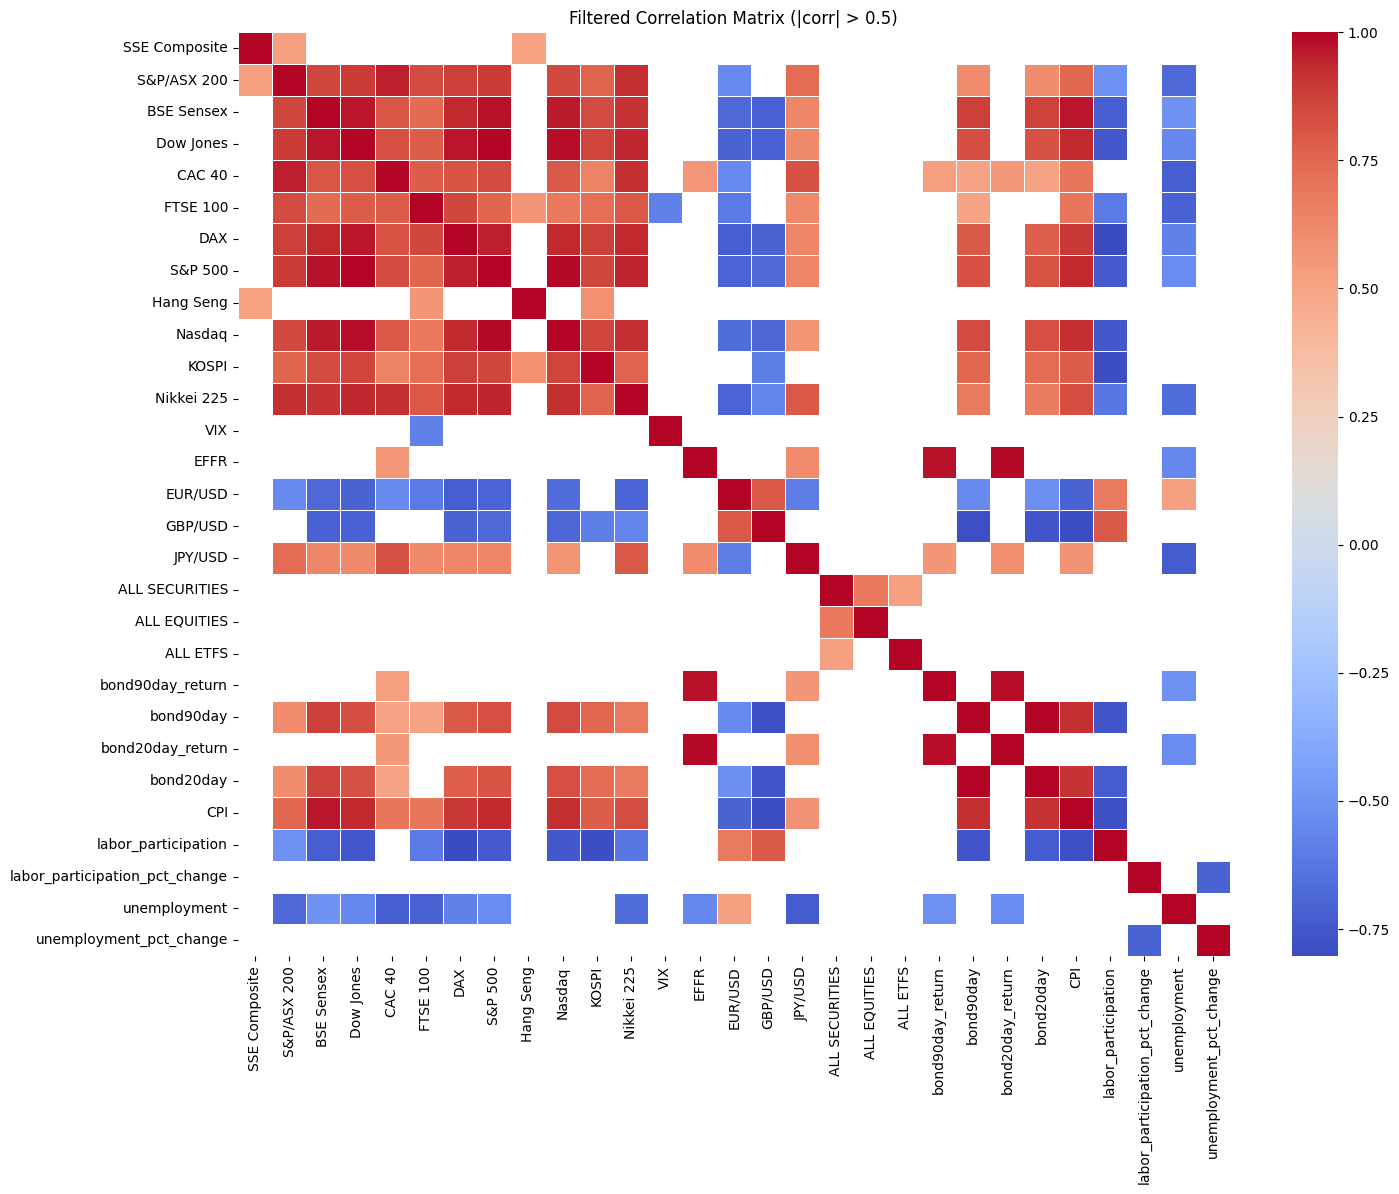

In [ ]:
corr_matrix = daily_df.drop(columns=['Date', 'Daily_Returns_Z_Score']).corr()

threshold = 0.5

# Filter the correlation matrix for values above the threshold (and below -threshold for negative correlations)
filtered_corr_matrix = corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)]

#print(filtered_corr_matrix)

# Visualize the filtered correlation matrix
plt.figure(figsize=(16, 12))  # Increase figure size
sns.heatmap(filtered_corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title(f'Filtered Correlation Matrix (|corr| > {threshold})')
plt.show()


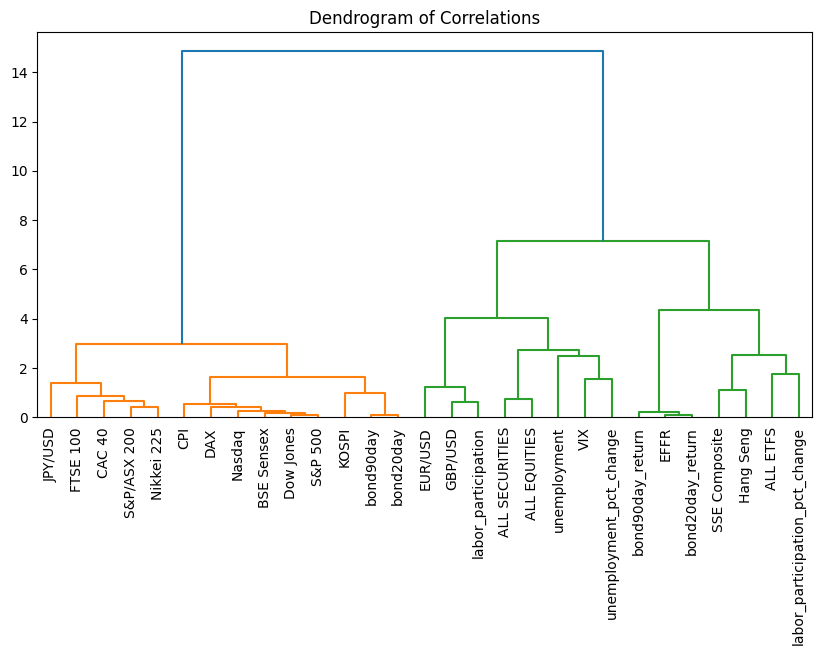

In [ ]:
# Use hierarchical clustering to cluster the correlation matrix
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute linkage for hierarchical clustering
linkage_matrix = linkage(corr_matrix, method='ward')

# Plot dendrogram for visualizing clusters
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=corr_matrix.columns, leaf_rotation=90)
plt.title('Dendrogram of Correlations')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

num_clusters = 4
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Step 4: Create a dictionary to store columns by cluster
clusters_dict = {}
for cluster_num in range(1, num_clusters + 1):
    clusters_dict[cluster_num] = corr_matrix.columns[cluster_labels == cluster_num].tolist()

# Step 5: Print or access the clusters and their associated columns
for cluster_num, columns in clusters_dict.items():
    print(f"Cluster {cluster_num}: {columns}")

Cluster 1: ['S&P/ASX 200', 'BSE Sensex', 'Dow Jones', 'CAC 40', 'FTSE 100', 'DAX', 'S&P 500', 'Nasdaq', 'KOSPI', 'Nikkei 225', 'JPY/USD', 'bond90day', 'bond20day', 'CPI']
Cluster 2: ['VIX', 'EUR/USD', 'GBP/USD', 'ALL SECURITIES', 'ALL EQUITIES', 'labor_participation', 'unemployment', 'unemployment_pct_change']
Cluster 3: ['EFFR', 'bond90day_return', 'bond20day_return']
Cluster 4: ['SSE Composite', 'Hang Seng', 'ALL ETFS', 'labor_participation_pct_change']


# Dimensionality Reduction - PCA

We can tell from the dendrogram that

In [ ]:
for cluster_num, columns in clusters_dict.items():
  pearson_corr_cluster = daily_df[columns].corr(method='pearson')
  print("Pearson Correlation for Cluster")
  print(pearson_corr_cluster)

Pearson Correlation for Cluster
             S&P/ASX 200  BSE Sensex  Dow Jones    CAC 40  FTSE 100       DAX  \
S&P/ASX 200     1.000000    0.852803   0.888541  0.951848  0.842413  0.877793   
BSE Sensex      0.852803    1.000000   0.970910  0.808394  0.736521  0.932387   
Dow Jones       0.888541    0.970910   1.000000  0.828472  0.787170  0.965157   
CAC 40          0.951848    0.808394   0.828472  1.000000  0.786939  0.816256   
FTSE 100        0.842413    0.736521   0.787170  0.786939  1.000000  0.856370   
DAX             0.877793    0.932387   0.965157  0.816256  0.856370  1.000000   
S&P 500         0.888381    0.976675   0.994071  0.840393  0.757265  0.955876   
Nasdaq          0.848933    0.964307   0.980698  0.796050  0.684268  0.931451   
KOSPI           0.753589    0.838182   0.861957  0.644072  0.725249  0.879778   
Nikkei 225      0.926733    0.910887   0.943456  0.922256  0.795883  0.932450   
JPY/USD         0.728073    0.631341   0.618786  0.819411  0.614750  0.634402

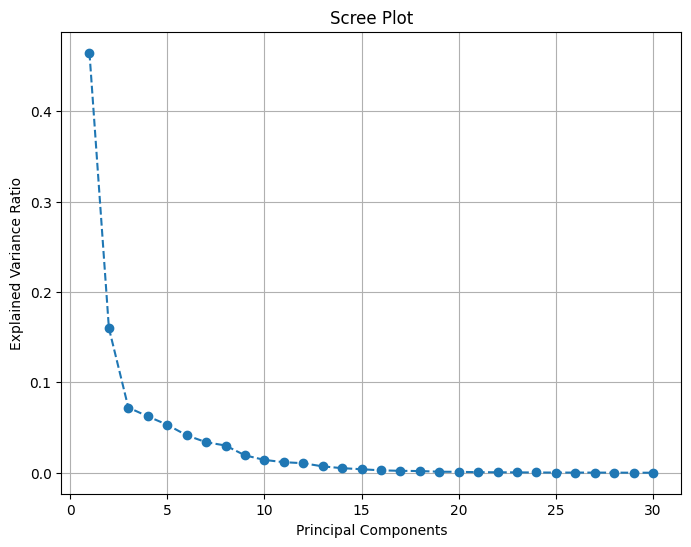

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_df.drop(columns=['Date']))  # Replace df with your dataset

pca = PCA()
pca.fit(scaled_data)

# Step 3: Create a scree plot
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
pca_optimal = PCA(n_components=10)
pca_optimal.fit(scaled_data)

# Step 4: Transform the data to the reduced feature space
pca_data = pca_optimal.transform(scaled_data)


In [ ]:
pca_data_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
pca_data_df['Date'] = daily_df['Date'].reset_index(drop=True)
pca_data_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Date
0,-4.651571,4.583773,0.037318,1.057986,1.247028,-3.075431,-1.158239,0.461680,-0.808430,1.071528,2006-01-03
1,-4.687430,4.597260,-0.045451,1.236794,1.294180,-1.759336,-0.288462,-3.610418,-0.922427,0.761935,2006-01-04
2,-4.844902,4.894304,-0.502465,2.040995,0.824229,-2.516652,-1.850207,-1.441566,-1.461050,0.820388,2006-01-05
3,-4.635872,4.651928,0.020207,0.237936,1.072766,-2.126070,-1.725464,-1.278667,-0.985706,0.943928,2006-01-06
4,-4.766250,4.825871,-0.425468,1.683669,0.880225,-2.180939,-1.535673,-2.234127,-1.310677,0.735892,2006-01-09


# Dimensionality Reduction - Random Forest

In [ ]:
# decision Tree
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel


X = daily_df.drop(columns=['Date', 'Daily_Returns_Z_Score'])
y = daily_df_orig['Daily_Returns_Z_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

tree = DecisionTreeRegressor(random_state=88)
tree.fit(X_train, y_train)
feature_importances = tree.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

threshold = 0.01
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

X_reduced = X[selected_features]

selector = SelectFromModel(tree, threshold='median')
X_train_reduced_rf = selector.fit_transform(X_train, y_train)
X_test_reduced_rf = selector.transform(X_test)

# Print the shape
print("Original Feature Set Shape:", X_train.shape)
print("Reduced Feature Set Shape:", X_train_reduced_rf.shape)

Feature Importance:
                           Feature  Importance
17                  ALL SECURITIES    0.086596
12                             VIX    0.083437
15                         GBP/USD    0.065230
19                        ALL ETFS    0.060009
10                           KOSPI    0.059660
18                    ALL EQUITIES    0.059551
16                         JPY/USD    0.056772
1                      S&P/ASX 200    0.044113
20                bond90day_return    0.040393
5                         FTSE 100    0.039578
22                bond20day_return    0.031820
11                      Nikkei 225    0.029869
14                         EUR/USD    0.029234
2                       BSE Sensex    0.028719
0                    SSE Composite    0.028406
9                           Nasdaq    0.027764
3                        Dow Jones    0.026122
6                              DAX    0.025618
8                        Hang Seng    0.024617
4                           CAC 40    0.

# EDA and Check Stationarity

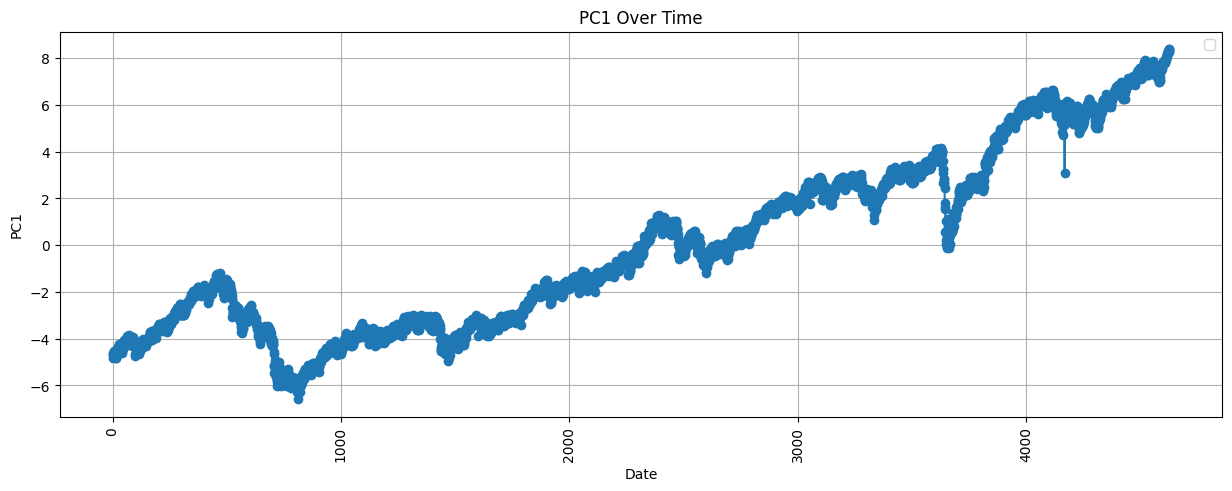

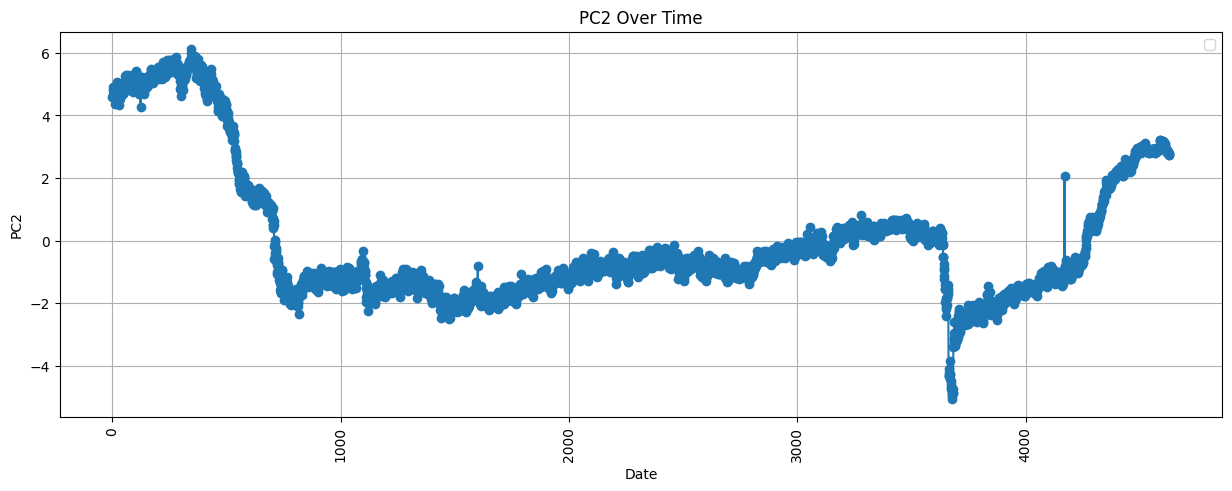

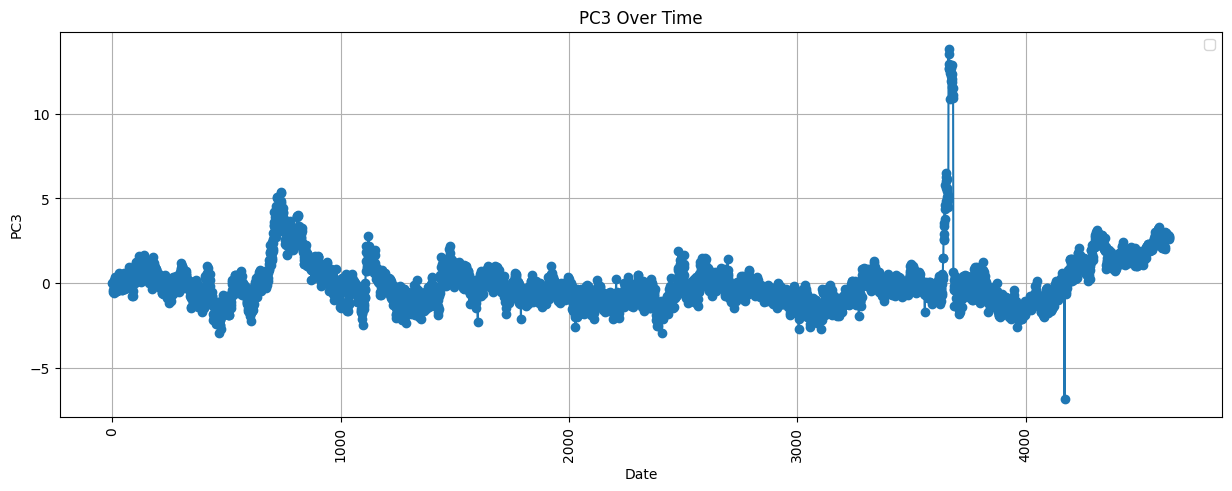

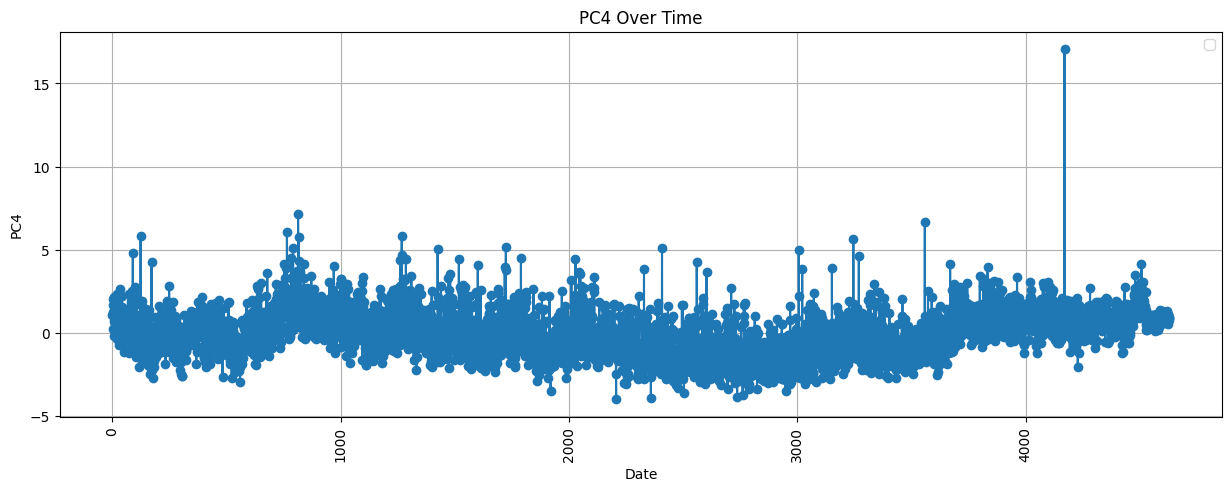

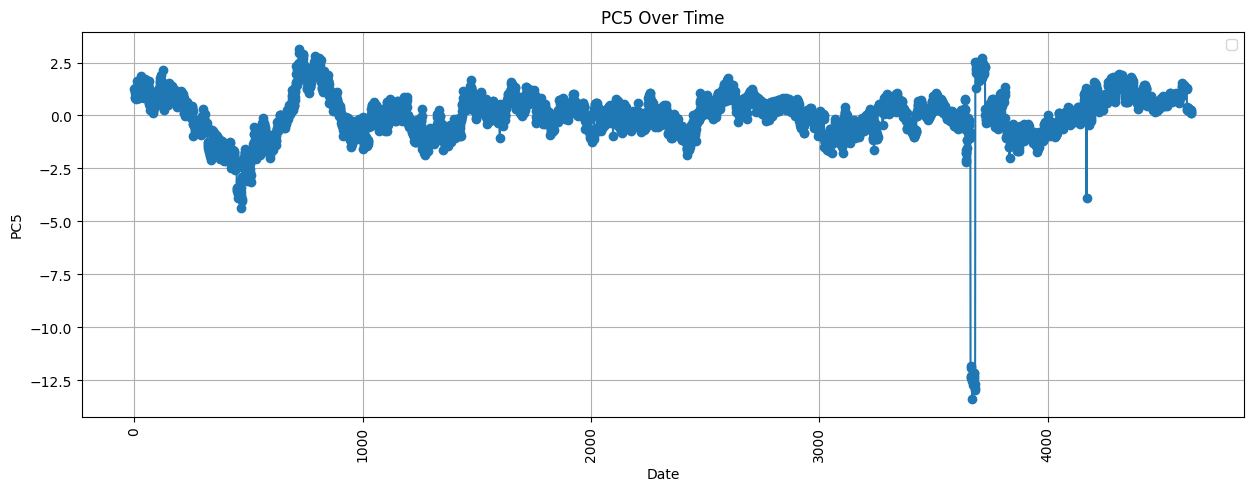

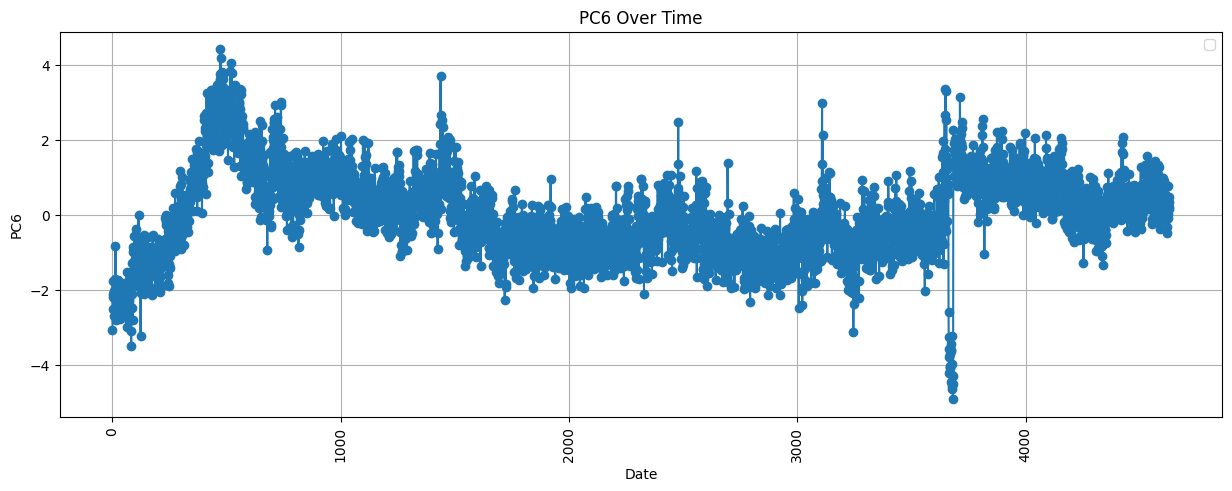

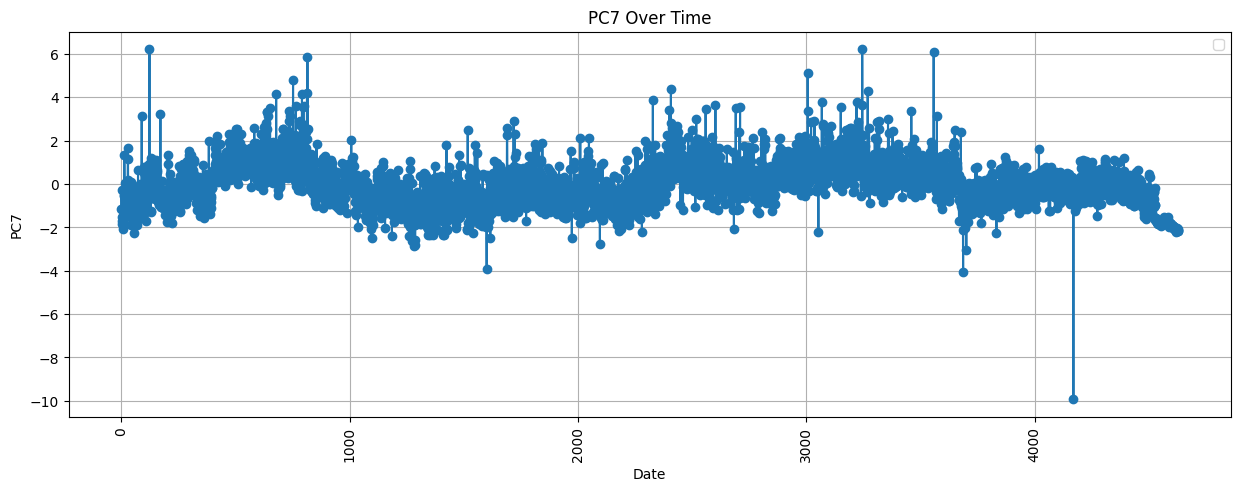

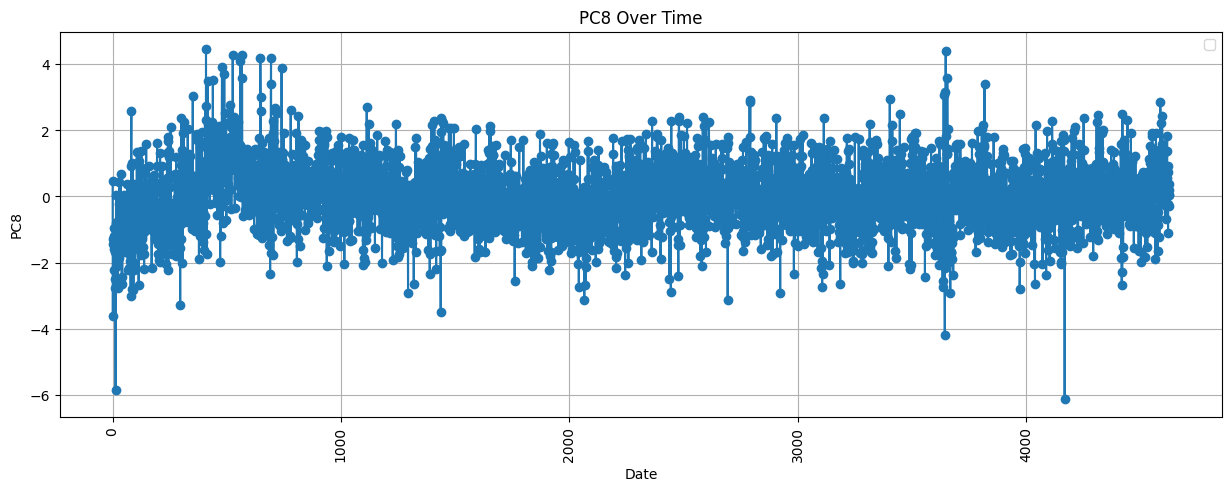

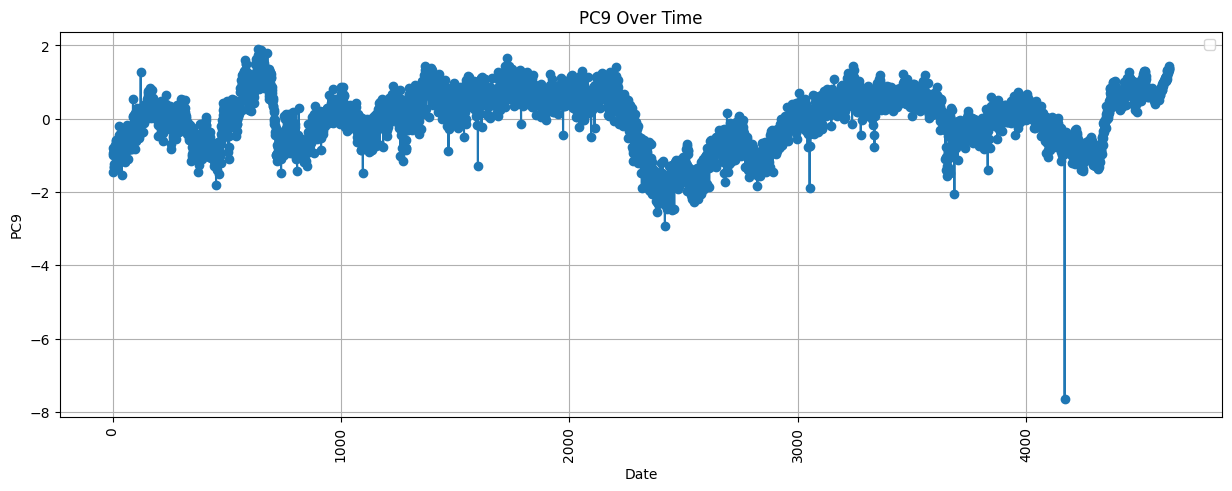

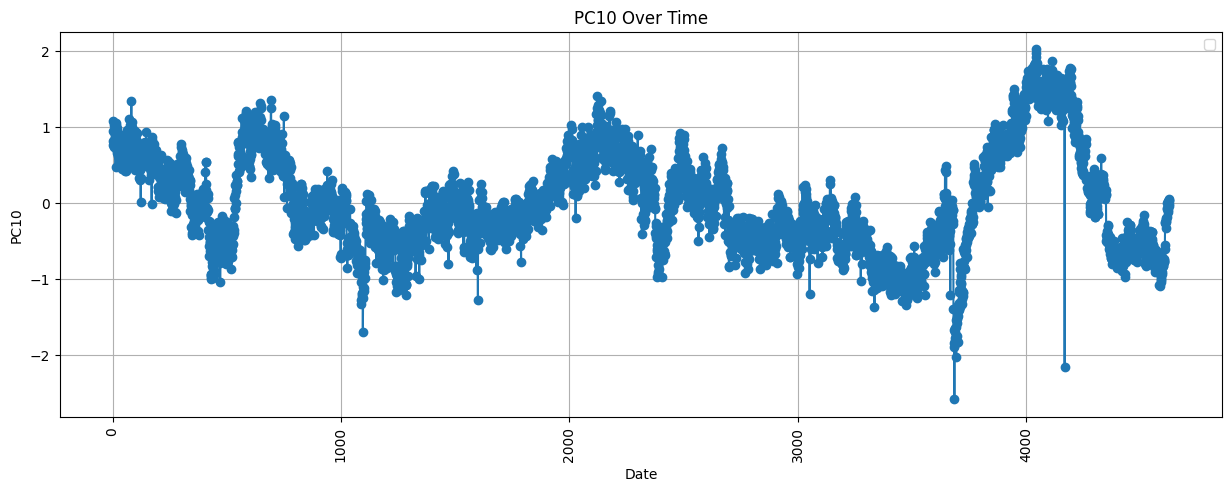

In [ ]:
for i in range(1, 11):
  plt.figure(figsize=(15, 5))
  plt.plot(pca_data_df[f'PC{i}'], marker='o')
  plt.xlabel('Date')
  plt.ylabel(f'PC{i}')
  plt.title(f'PC{i} Over Time')
  plt.xticks(rotation=90)
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity
def check_stationarity(df):
    results = {}
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Check only for numerical columns
            result = adfuller(df[column].dropna())
            p_value = result[1]  # The second value returned by adfuller is the p-value
            results[column] = p_value
            if p_value < 0.05:
                print(f"{column}: Stationary (p-value = {p_value:.5f})")
            else:
                print(f"{column}: Not Stationary (p-value = {p_value:.5f})")
    return results

stationarity_results = check_stationarity(pca_data_df.drop(columns='Date'))
stationarity_results_rf = check_stationarity(X_train_reduced_rf.drop(columns='Date'))

PC1: Not Stationary (p-value = 0.97588)
PC2: Not Stationary (p-value = 0.35231)
PC3: Stationary (p-value = 0.00000)
PC4: Stationary (p-value = 0.00004)
PC5: Stationary (p-value = 0.00000)
PC6: Stationary (p-value = 0.00208)
PC7: Stationary (p-value = 0.00435)
PC8: Stationary (p-value = 0.00000)
PC9: Stationary (p-value = 0.01239)
PC10: Stationary (p-value = 0.00204)


AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
# Function to difference non-stationary columns
def difference_non_stationary(df, stationarity_results, d=1):
    differenced_df = df.copy()

    for column, p_value in stationarity_results.items():
        if p_value >= 0.05:  # Non-stationary columns
            differenced_df[column] = df[column].diff(d).dropna()
            print(f"{column}: Differenced by order {d}")

    return differenced_df

# Call the function to difference non-stationary columns (based on the earlier stationarity test)
differenced_pca_df = difference_non_stationary(pca_data_df, stationarity_results)

differenced_pca_df.dropna(inplace=True)
differenced_pca_df.head()

PC1: Differenced by order 1
PC2: Differenced by order 1


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Date
1,-0.035859,0.013488,-0.045451,1.236794,1.294180,-1.759336,-0.288462,-3.610418,-0.922427,0.761935,2006-01-04
2,-0.157472,0.297044,-0.502465,2.040995,0.824229,-2.516652,-1.850207,-1.441566,-1.461050,0.820388,2006-01-05
3,0.209030,-0.242376,0.020207,0.237936,1.072766,-2.126070,-1.725464,-1.278667,-0.985706,0.943928,2006-01-06
4,-0.130378,0.173942,-0.425468,1.683669,0.880225,-2.180939,-1.535673,-2.234127,-1.310677,0.735892,2006-01-09
5,0.060405,-0.071661,-0.172979,0.693323,0.919995,-2.232766,-2.065041,-1.203524,-1.224858,0.803829,2006-01-10


# SARIMA

## Data Preparation

In [ ]:
X = differenced_pca_df.set_index('Date')  # Exogenous variables (PCA-transformed data without target variables)

# Prepare the target variables
y_daily = daily_df_orig['Daily_Returns_Z_Score']  # Target variable 1
y_weekly = daily_df_orig['Z_Score_Weekly_Returns']  # Target variable 2

y_daily = y_daily[1:]
y_weekly = y_weekly[1:]

y_daily.index = X.index
y_weekly.index = X.index

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_daily_train, y_daily_test = y_daily[:train_size], y_daily[train_size:]
y_weekly_train, y_weekly_test = y_weekly[:train_size], y_weekly[train_size:]

In [ ]:
y_daily_train

,Daily_Returns_Z_Score
Date,
2006-01-04,-2.266951
2006-01-05,0.329362
2006-01-06,-0.137766
2006-01-09,-0.633128
2006-01-10,0.104908
...,...
2020-05-25,0.121350
2020-05-26,1.417785
2020-05-27,1.129088


## SARIMA Fitting

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# SARIMA model for Daily_Returns_Z_Score
sarima_daily = SARIMAX(y_daily_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_daily_fit = sarima_daily.fit()

# SARIMA model for Z_Score_Weekly_Returns
#sarima_weekly = SARIMAX(y_weekly_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
#sarima_weekly_fit = sarima_weekly.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
y_daily_pred

,predicted_mean
3703,0.615061
3704,0.362978
3705,0.738023
3706,0.494539
3707,0.803387
...,...
4624,-0.072536
4625,0.315677
4626,0.116832
4627,-0.058924


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE for Daily_Returns_Z_Score model: 0.07281509098612447


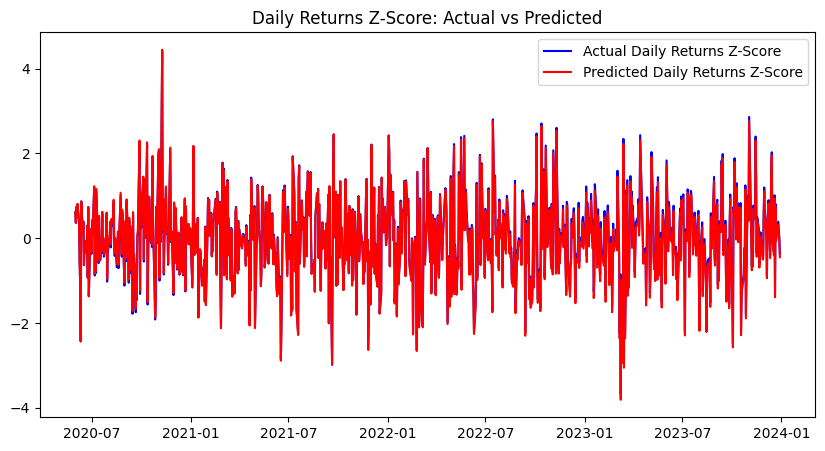

In [ ]:

# Make predictions on the test set
y_daily_pred = sarima_daily_fit.predict(start=len(y_daily_train), end=len(y_daily_train)+len(y_daily_test)-1, exog=X_test)
#y_weekly_pred = sarima_weekly_fit.predict(start=len(y_weekly_train), end=len(y_weekly_train)+len(y_weekly_test)-1, exog=X_test)

# Evaluate the models using RMSE (Root Mean Squared Error)
rmse_daily = mean_squared_error(y_daily_test, y_daily_pred, squared=False)
#rmse_weekly = mean_squared_error(y_weekly_test, y_weekly_pred, squared=False)

# Print the evaluation results
print(f"RMSE for Daily_Returns_Z_Score model: {rmse_daily}")
#print(f"RMSE for Z_Score_Weekly_Returns model: {rmse_weekly}")

import matplotlib.pyplot as plt

# Plot for Daily_Returns_Z_Score
plt.figure(figsize=(10, 5))
plt.plot(y_daily_test.index, y_daily_test, label='Actual Daily Returns Z-Score', color='blue')
plt.plot(y_daily_test.index, y_daily_pred, label='Predicted Daily Returns Z-Score', color='red')
plt.title('Daily Returns Z-Score: Actual vs Predicted')
plt.legend()
plt.show()

# Plot for Z_Score_Weekly_Returns
#plt.figure(figsize=(10, 5))
#plt.plot(y_weekly_test.index, y_weekly_test, label='Actual Weekly Returns Z-Score', color='blue')
#plt.plot(y_weekly_test.index, y_weekly_pred, label='Predicted Weekly Returns Z-Score', color='red')
#plt.title('Weekly Returns Z-Score: Actual vs Predicted')
#plt.legend()
#plt.show()

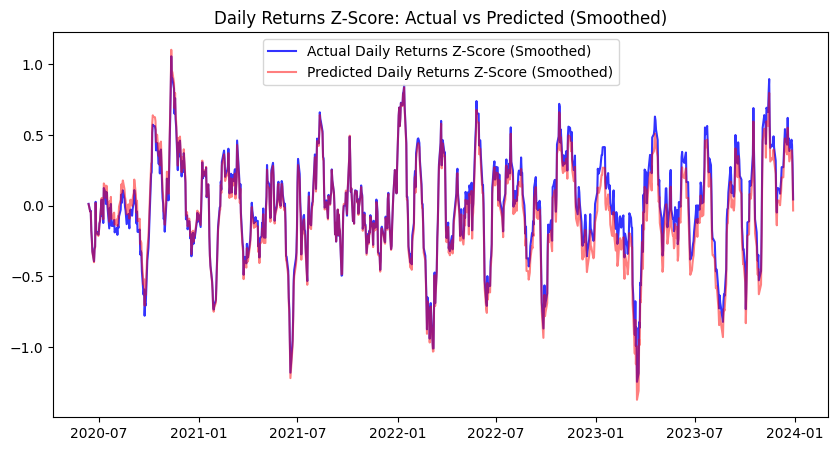

In [ ]:
import matplotlib.pyplot as plt

# Apply a rolling average to smooth the data
rolling_window = 10  # Adjust the window size to control the smoothing
y_daily_test_smooth = y_daily_test.rolling(window=rolling_window).mean()
y_daily_pred_smooth = y_daily_pred.rolling(window=rolling_window).mean()

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the smoothed actual values
ax.plot(y_daily_test.index, y_daily_test_smooth, label='Actual Daily Returns Z-Score (Smoothed)', color='blue', alpha=0.8)

# Plot the smoothed predicted values with some transparency
ax.plot(y_daily_test.index, y_daily_pred_smooth, label='Predicted Daily Returns Z-Score (Smoothed)', color='red', alpha=0.5)

# Add labels and legend
ax.set_title('Daily Returns Z-Score: Actual vs Predicted (Smoothed)')
ax.legend()

# Display the plot
plt.show()


In [ ]:
y_daily_test.index

DatetimeIndex(['2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=926, freq=None)

In [ ]:
predicted_daily_returns_z_score = pd.DataFrame({
    'Date': y_daily_test.index,  # Date from y_daily_test
    'Predicted_Daily_Returns_Z_Score': y_daily_pred  # Predicted values from the SARIMA model
})

# Add a 'daily_anomaly' column: 1 if the z-score is above 2, -1 if it's below -2, else 0
predicted_daily_returns_z_score['predicted_daily_anomaly'] = predicted_daily_returns_z_score['Predicted_Daily_Returns_Z_Score'].apply(lambda x: 1 if x > 2 else (-1 if x < -2 else 0))


In [ ]:
predicted_daily_returns_z_score

,Date,Predicted_Daily_Returns_Z_Score,predicted_daily_anomaly
3703,2020-06-01,0.615061,0
3704,2020-06-02,0.362978,0
3705,2020-06-03,0.738023,0
3706,2020-06-04,0.494539,0
3707,2020-06-05,0.803387,0
...,...,...,...
4624,2023-12-22,-0.072536,0
4625,2023-12-26,0.315677,0
4626,2023-12-27,0.116832,0
4627,2023-12-28,-0.058924,0


In [ ]:
real_anomaly_df = daily_df_orig[['Date', 'daily_anomaly']]
predicted_daily_returns_z_score = pd.merge(predicted_daily_returns_z_score, real_anomaly_df[['Date', 'daily_anomaly']], on='Date', how='left')
predicted_daily_returns_z_score['correct_prediction'] = predicted_daily_returns_z_score['predicted_daily_anomaly'] == predicted_daily_returns_z_score['daily_anomaly']
predicted_daily_returns_z_score.head()

NameError: name 'predicted_daily_returns_z_score' is not defined

In [ ]:
correct_prediction_percentage = (predicted_daily_returns_z_score['correct_prediction'].sum() / len(predicted_daily_returns_z_score)) * 100
print(f"Percentage of Correct Predictions: {correct_prediction_percentage:.2f}%")

Percentage of Correct Predictions: 99.68%


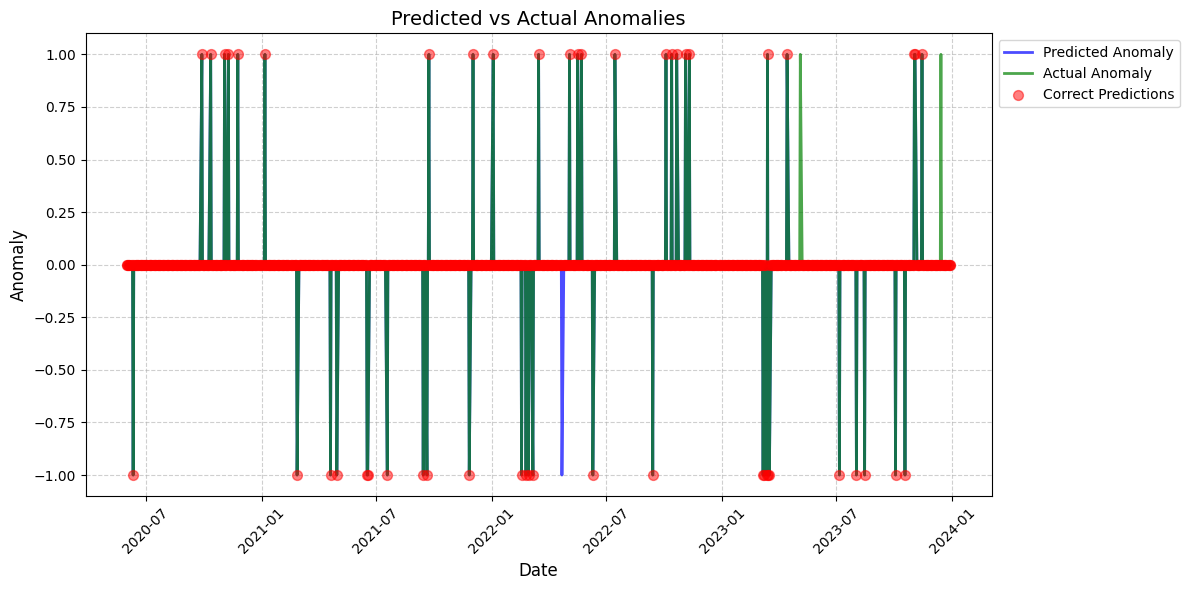

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into the DataFrame `df`

# Plotting
plt.figure(figsize=(12, 6))

# Plot the predicted anomalies
plt.plot(predicted_daily_returns_z_score['Date'], predicted_daily_returns_z_score['predicted_daily_anomaly'], label='Predicted Anomaly', color='blue', linewidth=2, alpha=0.7)

# Plot the actual anomalies
plt.plot(predicted_daily_returns_z_score['Date'], predicted_daily_returns_z_score['daily_anomaly'], label='Actual Anomaly', color='green', linewidth=2, alpha=0.7)

# Highlight where predictions were correct with larger, translucent markers
correct_predictions = predicted_daily_returns_z_score[predicted_daily_returns_z_score['correct_prediction']]
plt.scatter(correct_predictions['Date'], correct_predictions['predicted_daily_anomaly'],
            color='red', label='Correct Predictions', s=50, alpha=0.5, zorder=5)

# Adding labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Anomaly', fontsize=12)
plt.title('Predicted vs Actual Anomalies', fontsize=14)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the legend outside the plot for better visibility
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Make the layout tight so everything fits well
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

dtrain_daily = xgb.DMatrix(X_train, label=y_daily_train)
dtest_daily = xgb.DMatrix(X_test, label=y_daily_test)

dtrain_weekly = xgb.DMatrix(X_train, label=y_weekly_train)
dtest_weekly = xgb.DMatrix(X_test, label=y_weekly_test)


params = {
    'objective': 'reg:squarederror',
    'max_depth': 10,  # Maximum depth of a tree
    'eta': 0.01,  # Learning rate
    'eval_metric': 'rmse'
}

# Model for Daily Returns
print("Training XGBoost model for Daily Returns...")
num_boost_round = 500  # Number of boosting rounds
xgb_model_daily = xgb.train(params, dtrain_daily, num_boost_round)

# Model for Weekly Returns
print("Training XGBoost model for Weekly Returns...")
xgb_model_weekly = xgb.train(params, dtrain_weekly, num_boost_round)

# Predictions
y_daily_pred = xgb_model_daily.predict(dtest_daily)
y_weekly_pred = xgb_model_weekly.predict(dtest_weekly)

# Model RMSE
rmse_daily = mean_squared_error(y_daily_test, y_daily_pred, squared=False)
print(f"RMSE for Daily Returns Prediction: {rmse_daily}")
rmse_weekly = mean_squared_error(y_weekly_test, y_weekly_pred, squared=False)
print(f"RMSE for Weekly Returns Prediction: {rmse_weekly}")




Training XGBoost model for Daily Returns...
Training XGBoost model for Weekly Returns...
RMSE for Daily Returns Prediction: 0.15436364571227507
RMSE for Weekly Returns Prediction: 0.9660690369247813


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
y_daily_score=[1 if y_daily_pred[i]>=2 else (-1 if y_daily_pred[i]<=-2 else 0) for i in range(len(y_daily_pred))]
y_weekly_score=[1 if y_weekly_pred[i]>=2 else (-1 if y_weekly_pred[i]<=-2 else 0) for i in range(len(y_weekly_pred))]

# Add a 'daily_anomaly' column: 1 if the z-score is above 2, -1 if it's below -2, else 0
y_daily_pred['predicted_daily_anomaly'] = predicted_daily_returns_z_score['Predicted_Daily_Returns_Z_Score'].apply(lambda x: 1 if x > 2 else (-1 if x < -2 else 0))


[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import pandas as pd

daily_score = [1 if pred >= 2 else (-1 if pred <= -2 else 0) for pred in y_daily_pred]
weekly_score = [1 if pred >= 2 else (-1 if pred <= -2 else 0) for pred in y_weekly_pred]

dates = X_test.index

daily_score_df = pd.DataFrame({'Date': dates, 'daily_score': daily_score})
weekly_score_df = pd.DataFrame({'Date': dates, 'weekly_score': weekly_score})

real_anomaly_df = daily_df_orig[['Date', 'daily_anomaly','weekly_anomaly']]
merged_df = pd.merge(daily_score_df, real_anomaly_df[['Date', 'daily_anomaly','weekly_anomaly']], on='Date', how='left')

merged_df = pd.merge(merged_df, weekly_score_df, on='Date', how='left')

print(merged_df)
merged_df['correct_prediction_daily'] = merged_df['daily_score'] == merged_df['daily_anomaly']
correct_prediction_percentage = (merged_df['correct_prediction_daily'].sum() / len(merged_df)) * 100
print(f"Percentage of Correct daily Predictions: {correct_prediction_percentage:.2f}%")

merged_df['correct_prediction_weekly'] = merged_df['weekly_score'] == merged_df['weekly_anomaly']
correct_prediction_percentage = (merged_df['correct_prediction_weekly'].sum() / len(merged_df)) * 100
print(f"Percentage of Correct weekly Predictions: {correct_prediction_percentage:.2f}%")


          Date  daily_score  daily_anomaly  weekly_anomaly  weekly_score
0   2020-06-01            0              0               0             0
1   2020-06-02            0              0               0             0
2   2020-06-03            0              0               0             0
3   2020-06-04            0              0               0             0
4   2020-06-05            0              0               1             0
..         ...          ...            ...             ...           ...
921 2023-12-22            0              0               0             0
922 2023-12-26            0              0               0             0
923 2023-12-27            0              0               0             0
924 2023-12-28            0              0               0             0
925 2023-12-29            0              0               0             0

[926 rows x 5 columns]
Percentage of Correct daily Predictions: 98.92%
Percentage of Correct weekly Predictions: 96.00%


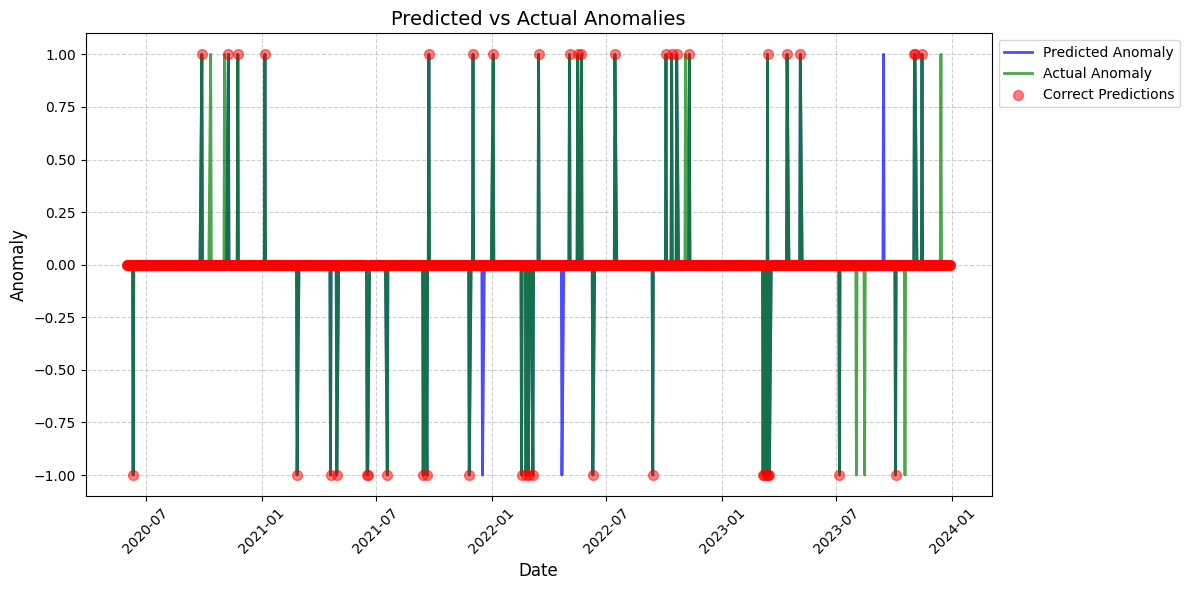

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the predicted anomalies
plt.plot(merged_df['Date'], merged_df['daily_score'], label='Predicted Anomaly', color='blue', linewidth=2, alpha=0.7)

# Plot the actual anomalies
plt.plot(merged_df['Date'], merged_df['daily_anomaly'], label='Actual Anomaly', color='green', linewidth=2, alpha=0.7)

# Highlight where predictions were correct
correct_predictions = merged_df[merged_df['correct_prediction_daily']]
plt.scatter(correct_predictions['Date'], correct_predictions['daily_anomaly'],
            color='red', label='Correct Predictions', s=50, alpha=0.5, zorder=5)


plt.xlabel('Date', fontsize=12)
plt.ylabel('Anomaly', fontsize=12)
plt.title('Predicted vs Actual Anomalies', fontsize=14)


plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.tight_layout()

plt.show()

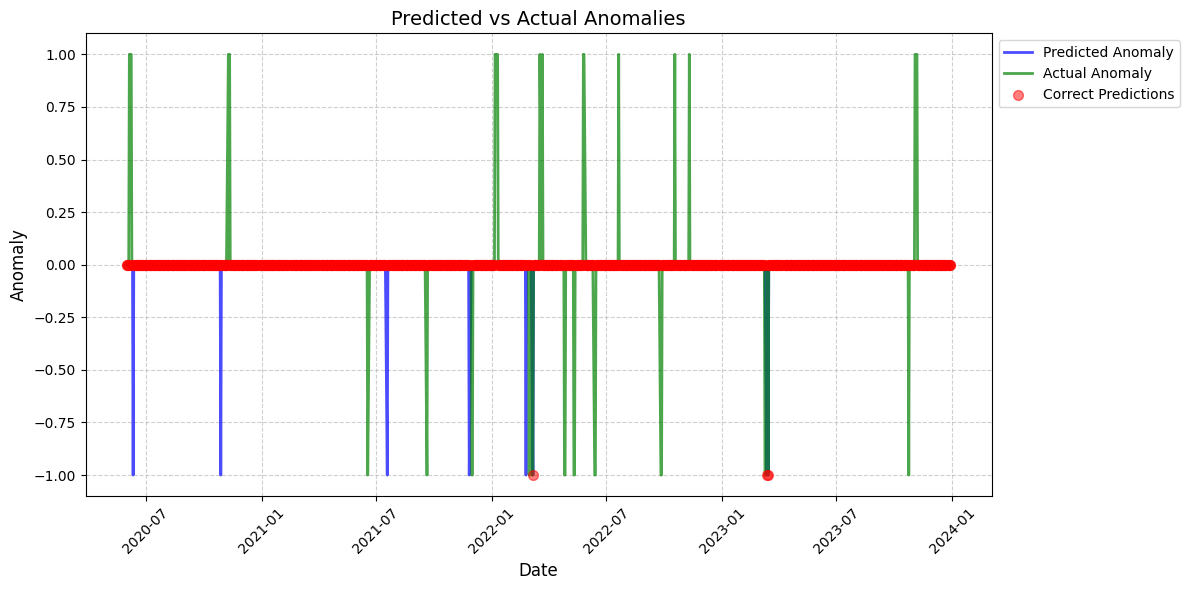

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['weekly_score'], label='Predicted Anomaly', color='blue', linewidth=2, alpha=0.7)
plt.plot(merged_df['Date'], merged_df['weekly_anomaly'], label='Actual Anomaly', color='green', linewidth=2, alpha=0.7)

# Highlight where predictions were correct
correct_predictions = merged_df[merged_df['correct_prediction_weekly']]
plt.scatter(correct_predictions['Date'], correct_predictions['weekly_anomaly'],
            color='red', label='Correct Predictions', s=50, alpha=0.5, zorder=5)


plt.xlabel('Date', fontsize=12)
plt.ylabel('Anomaly', fontsize=12)
plt.title('Predicted vs Actual Anomalies', fontsize=14)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.tight_layout()

plt.show()

In [ ]:
correct_predictions

,Date,daily_score,daily_anomaly,weekly_anomaly,weekly_score,correct_prediction_daily,correct_prediction_weekly
0,2020-06-01,0,0,0,0,True,True
1,2020-06-02,0,0,0,0,True,True
2,2020-06-03,0,0,0,0,True,True
3,2020-06-04,0,0,0,0,True,True
6,2020-06-09,0,0,0,0,True,True
...,...,...,...,...,...,...,...
921,2023-12-22,0,0,0,0,True,True
922,2023-12-26,0,0,0,0,True,True
923,2023-12-27,0,0,0,0,True,True
924,2023-12-28,0,0,0,0,True,True
